# Introduction to regression with neural network with tensorflow


What is Neural Network?
Neural Network is a machine learning algorithm that is inspired by the way biological neural networks in the human brain process information. The neural network itself adjusts the weights on each of the neurons automatically during training.

What is Regression?
Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

So what is Neural Network Regression?
Neural Network Regression is a supervised learning algorithm that is used when the target variable is continuous and nature of the task is regression. In this algorithm, we have a set of inputs (x) and a set of outputs (Y). We train our model on a training dataset(x,y) to get an optimal value for the weights. Using these set of weights, we are able to predict for any new input data.




In [1]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# check all the versions
print(tf.__version__)
print(np.__version__)
print(pd.__version__)


2.16.1
1.26.4
2.2.2


# Creating data to view and fit


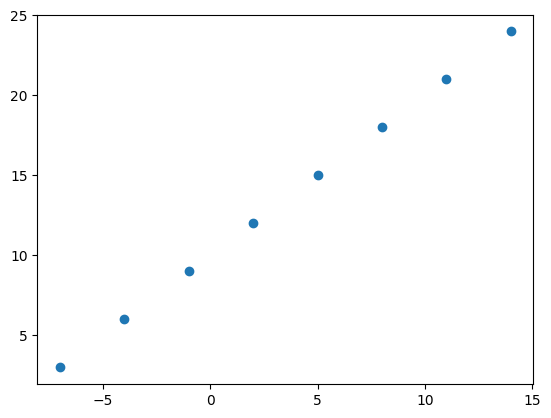

In [2]:


# create Feature

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

# input and output shape



In [4]:
# creata a demo tensor for our housing price problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# turn nurpy array into tensor

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf. cast(tf.constant (y) , dtype=tf.float32)

X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), TensorShape([]))

## Steps in modeling with tensorflow

1. **Creating a model** = Define the input and outpit layers, as well as the hidden layers of a deep learning model

2. **compiling a model** - define the loss function (in other words, the fuinction which tells our model how to improve the pattern its learning) and evalutation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the mode try to find patterns between X and y

In [8]:
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# complie the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 9.7321 - mae: 9.7321
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.5996 - mae: 9.5996
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.4671 - mae: 9.4671
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.3346 - mae: 9.3346
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.2021 - mae: 9.2021


In [9]:
# check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[21.326012]], dtype=float32)

## improving a model

We can improve out model bnu altering the steps we took to create a model

1. **Creating a mode** - We mnight add more leayers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation fucntion of each layer.

2. **Compiling a model** - here we might chage the optimziation function of perhaps the learning rate of the optization function.

3. **Fitting a mode** - Here we might fit model for more epoxhs (leave it training for longer) or more data (give model more example to learn form)


In [11]:
# lets rebuid our model

# 1. create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a mode
model.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. fit a model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 16.7843 - mae: 16.7843
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.5030 - mae: 16.5030
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.2218 - mae: 16.2218
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.9405 - mae: 15.9405
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.6593 - mae: 15.6593
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.3780 - mae: 15.3780
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.0968 - mae: 15.0968
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.8508 - mae: 14.8508
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.7183 - mae: 14.7183
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.5858 - mae: 14.5858
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.4533 - mae: 14.4533
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.3208 - mae: 14.3208
Epoch 13/100
1/1 ━━━━━━━

In [12]:
model.predict(np.array([17.0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[29.784163]], dtype=float32)

In [13]:
# create the model with an extra hidden layers and 100 hidden units

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
 )

#fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 13.7142 - mae: 13.7142
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.0410 - mae: 13.0410
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.3660 - mae: 12.3660
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.6839 - mae: 11.6839
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.9921 - mae: 10.9921
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.2893 - mae: 10.2893
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.5740 - mae: 9.5740
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8443 - mae: 8.8443
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.0982 - mae: 8.0982
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3331 - mae: 7.3331
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.7148 - mae: 6.7148
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.7852 - mae: 6.7852
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [14]:
model.predict(np.array([17.0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[26.78364]], dtype=float32)

# Evaluate the model

In practice, a typicall workflow you will go through when building neural network is:

Build a model -> Fit it -> Evaulate it -> Tweak a model -> fit it -> evaluate it...

When it comes to evaluation, there are 3 words you should memorize

> "Visualize, Visualize, Visualize"

Its a good idea to visualize:
- The data - What data are we working with? What does it look like?
- The model itself - What does our model lookl like?
The traiuninbg of a model - How does a model perform while it learns?
- The prediction of the model - How do the prediction of a model line up against the ground truth (the original label)




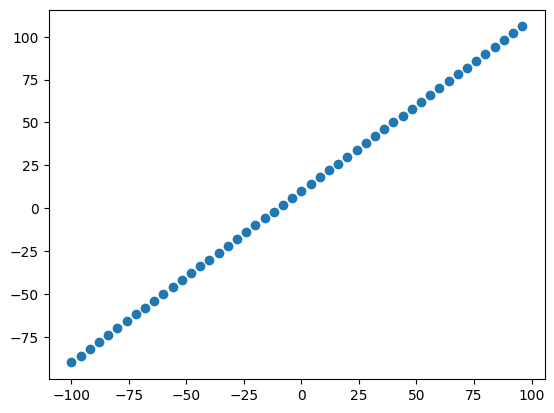

In [15]:
# make a bigger dataset

X = tf.range(-100, 100, 4)


y = X + 10
X, y

# visualize the data
plt.scatter(X, y)


### 3 steps...

- **Training set** - The model learns form this data, whioch is typically 70-80% of the dataset you have.

- **validation set** - The model get tuned on this data which is 10-15% of the data avaiable.

- **Test Set** - The model gfets evaluated on this data to test what it has learne, this set is typically 10-15% of the total data avaiable







In [17]:
# split the data into train and test sets

X_train = X[:40] #first 40 sample, 80% of data
y_train = y[:40] #first 40 sample, 80% of data

X_test = X[40:] #last 10 sample, 20% of the data
y_test = y[40:] #last 10 sample, 20% of the data

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

In [18]:
# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie the model

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.summary()

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# # Let's create a model which builds automatically by defining the input_shape argument in the first layer
# tf.random.set_seed(42)

# # 1. Create a model (same as above)
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
#   tf.keras.layers.Dense(1, name="output_layer")
# ], name="model_1")

# # 2. Compile the model (same as above)
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])

# create the model with an extra hidden layers and 100 hidden units

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
 )


/opt/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8372 - mae: 9.8372  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1765 - mae: 9.1765 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6573 - mae: 7.6573 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7764 - mae: 7.7764 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5222 - mae: 7.5222 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9382 - mae: 6.9382 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8032 - mae: 7.8032 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8354 - mae: 6.8354 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1968 - mae: 7.1968 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4691 - mae: 6.4691 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1828 - mae: 7.1828 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5409 - mae: 6.5409 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

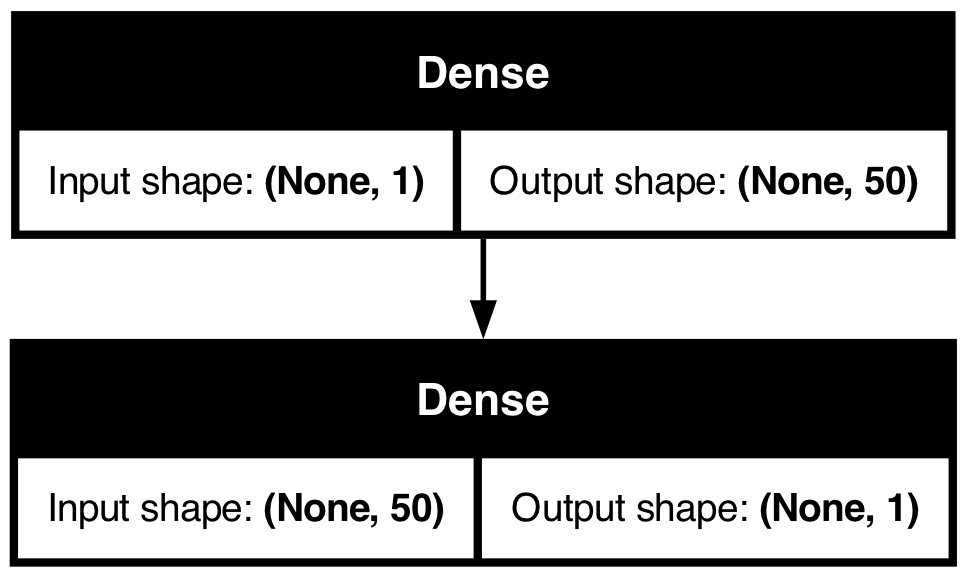

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model prediction

To visualize mode, its ia a good idea to plot them against the ground truth labes.

Often you will see this in form of y_test or y_true versus y_pred (ground truth versus your model)

In [23]:
# make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ 68.683426],
       [ 72.59654 ],
       [ 76.50967 ],
       [ 80.42279 ],
       [ 84.33591 ],
       [ 88.24903 ],
       [ 92.16215 ],
       [ 96.07527 ],
       [ 99.98838 ],
       [103.901505]], dtype=float32)

In [24]:
import matplotlib.pyplot as plt

# create a ploting functin
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred,
                    title="Model",
                    description=""):
  """
  Plot training data, test data and compared prediction to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # plot training data
  plt.scatter(train_data, train_labels, c="b", label="training data")
  # plot test data
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot prediction
  plt.scatter(test_data, prediction, c="r", label="Prediction")

  plt.grid(visible=True)

  plt.title(title)

  #show legends
  plt.legend()

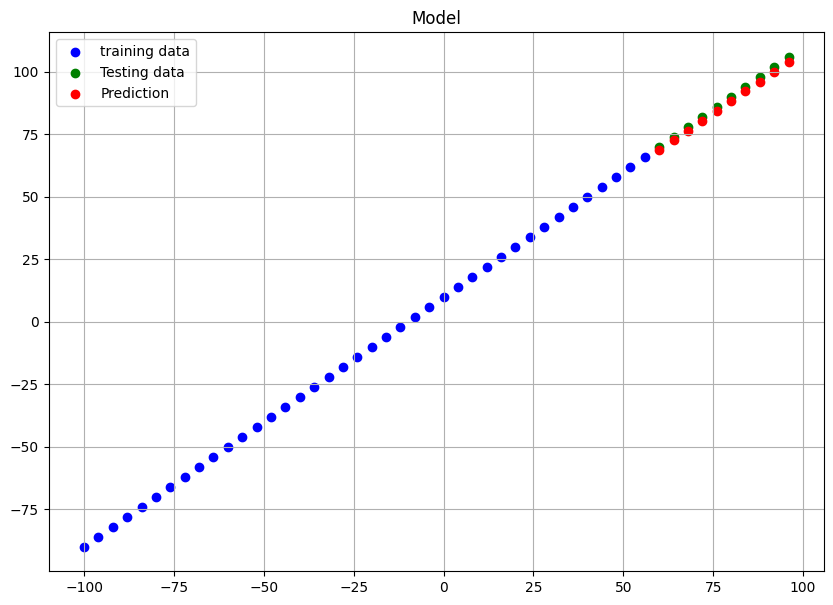

In [25]:
plot_prediction(X_train, y_train, X_test, y_test, y_pred)

### Evaluting our model prediction with regression evaluation metrics

Depending on the problem, you are working on, ther will be different evaluatuion metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
- MAE - Mean absolute error, "on avereage, how wrong is each of my model predictions"
  - Best for starter metrix for any regression problem
  - `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()`
- MSE - Mean Square Error, "Square the average errors and find the average"
  - Best when large errors are more signigficant than smaller ones
  - `tf.keras.losses.MSE()` or `tf.metrics.mean_square_error()`
- Huber - Combination of MSE and MAE
  - Best when less sensitive to outlier

In [26]:
tf.constant(y_pred)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.683426,  72.59654 ,  76.50967 ,  80.42279 ,  84.33591 ,
        88.24903 ,  92.16215 ,  96.07527 ,  99.98838 , 103.901505],
      dtype=float32)>

In [27]:
# Evaluate te model on the test test

model.evaluate(X_test, y_test)
# Returns the (loss and mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.7075 - mae: 1.7075


[1.7075332403182983, 1.7075332403182983]

In [28]:
# Caluate the mean absoute error

mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.7075332>

In [29]:
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.977942>

In [30]:
def mae(y_test, y_pred):
    return tf.keras.losses.MAE(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.keras.losses.MSE(y_test, y_pred)

print ("Mean Absolute Error: ", mae(y_test, tf.squeeze(y_pred)))
print ("Mean Square Error: ", mse(y_test, tf.squeeze(y_pred)))

Mean Absolute Error:  tf.Tensor(1.7075332, shape=(), dtype=float32)
Mean Square Error:  tf.Tensor(2.977942, shape=(), dtype=float32)


# Running Experimenmt to improve the model

```
Build a model -> Fit it -> evalutate it  -> tweake it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. **Get more Data** - Get more xamples for you model to train on (more opportunites to learn patterns or releationships between features and labels)
2. **Make you model Larger** - This might come in form of lmore layers or mmore hidden untits in each layers.
3. **Train for longer** - Give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - Same as original model, 1 ayaers, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

#### MODEL 1
`model_1` - Same as original model, 1 ayaers, trained for 100 epochs.


In [31]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Mean Absolute Error:  tf.Tensor(4.735437, shape=(), dtype=float32)
Mean Square Error:  tf.Tensor(23.064579, shape=(), dtype=float32)


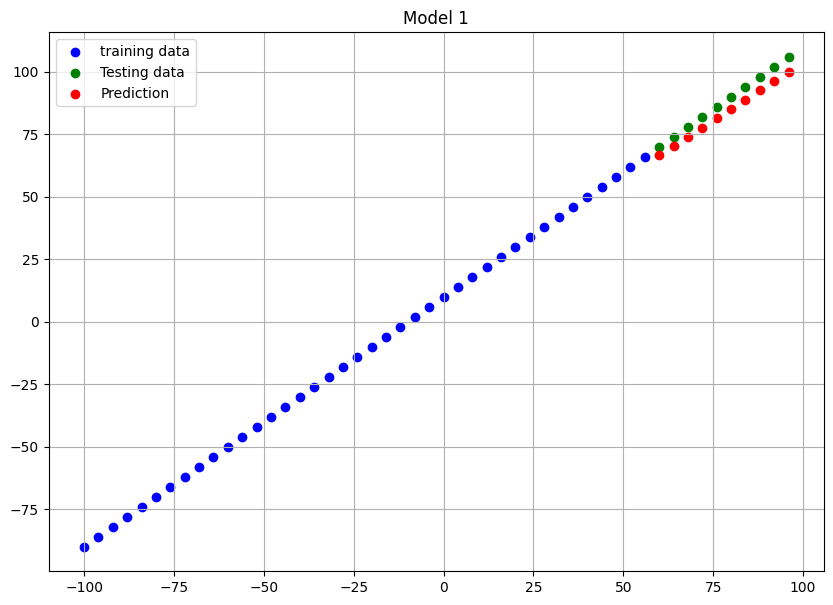

In [32]:
y_pred_1 = model_1.predict(y_test)

plot_prediction(prediction=y_pred_1, title="Model 1")

mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))


print ("Mean Absolute Error: ", mae_1)
print ("Mean Square Error: ", mse_1)

#### MODEL 2
`model_2` - 2 Layaers, trained for 100 epochs.


In [59]:

tf.seed.random_
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
 )

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.4304 - mae: 51.4304  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.6755 - mae: 36.6755 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5359 - mae: 22.5359 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1444 - mae: 10.1444 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5513 - mae: 11.5513 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4054 - mae: 14.4054 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1101 - mae: 15.1101 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5298 - mae: 13.5298 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1805 - mae: 11.1805 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2910 - mae: 8.2910 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2755 - mae: 8.2755 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7489 - mae: 9.7489 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error:  tf.Tensor(2.1708846, shape=(), dtype=float32)
Mean Square Error:  tf.Tensor(4.8089848, shape=(), dtype=float32)


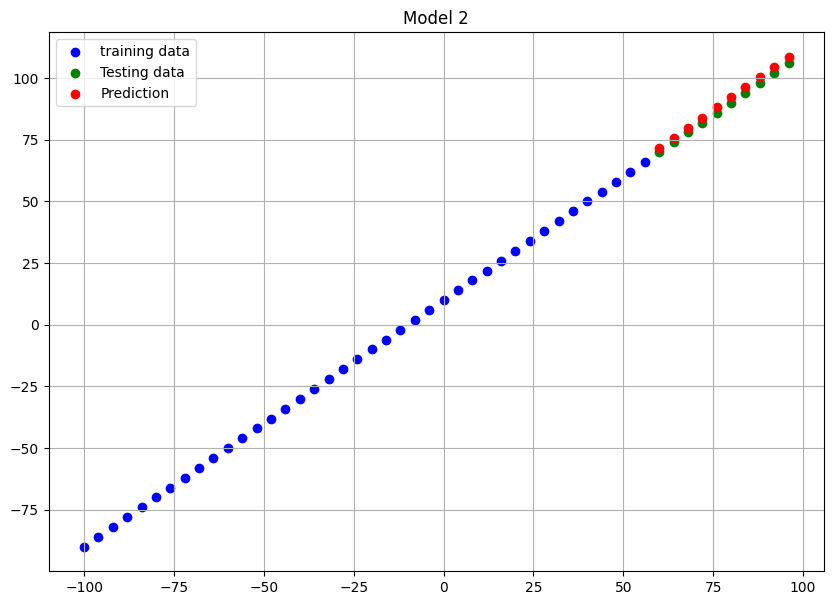

In [70]:

y_pred_2 = model_2.predict(X_test)

plot_prediction(prediction=y_pred_2, title="Model 2")

mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))

print ("Mean Absolute Error: ", mae_2)
print ("Mean Square Error: ", mse_2)

#### MODEL 3
`model_3` - 2 Layaers, trained for 500 epochs.

In [68]:

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
 )

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500


/opt/miniconda3/envs/tensor/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.6526 - mae: 34.6526  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.0504 - mae: 21.0504 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3241 - mae: 9.3241 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7697 - mae: 11.7697 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7315 - mae: 13.7315 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3023 - mae: 13.3023 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3230 - mae: 11.3230 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4049 - mae: 8.4049 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2050 - mae: 8.2050 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3528 - mae: 9.3528 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9720 - mae: 7.9720 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8621 - mae: 6.8621 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mean Absolute Error:  tf.Tensor(1.3675216, shape=(), dtype=float32)
Mean Square Error:  tf.Tensor(1.9090121, shape=(), dtype=float32)


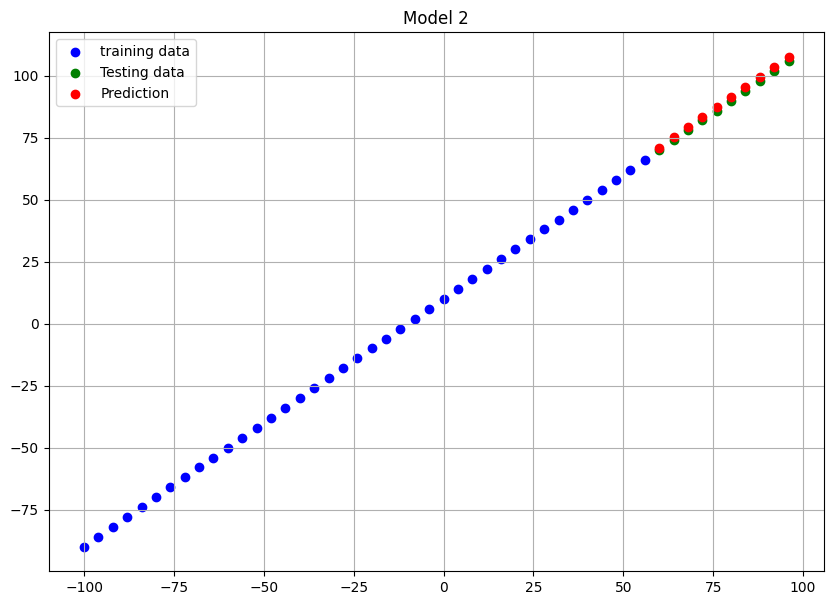

In [69]:

y_pred_3 = model_3.predict(X_test)

plot_prediction(prediction=y_pred_3, title="Model 2")

mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

print ("Mean Absolute Error: ", mae_3)
print ("Mean Square Error: ", mse_3)